   # Ford go bike System Data

In [249]:
#import all needed packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import os
import glob
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline

In [250]:
#read CSV file
df = pd.read_csv('201902-fordgobike-tripdata.csv')

In [251]:
df.tail()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
183407,480,2019-02-01 00:04:49.7240,2019-02-01 00:12:50.0340,27.0,Beale St at Harrison St,37.788059,-122.391865,324.0,Union Square (Powell St at Post St),37.788300,-122.408531,4832,Subscriber,1996.0,Male,No
183408,313,2019-02-01 00:05:34.7440,2019-02-01 00:10:48.5020,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,66.0,3rd St at Townsend St,37.778742,-122.392741,4960,Subscriber,1984.0,Male,No
183409,141,2019-02-01 00:06:05.5490,2019-02-01 00:08:27.2200,278.0,The Alameda at Bush St,37.331932,-121.904888,277.0,Morrison Ave at Julian St,37.333658,-121.908586,3824,Subscriber,1990.0,Male,Yes
183410,139,2019-02-01 00:05:34.3600,2019-02-01 00:07:54.2870,220.0,San Pablo Ave at MLK Jr Way,37.811351,-122.273422,216.0,San Pablo Ave at 27th St,37.817827,-122.275698,5095,Subscriber,1988.0,Male,No
183411,271,2019-02-01 00:00:20.6360,2019-02-01 00:04:52.0580,24.0,Spear St at Folsom St,37.789677,-122.390428,37.0,2nd St at Folsom St,37.785000,-122.395936,1057,Subscriber,1989.0,Male,No


In [252]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [253]:
df.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

# Data wrangling

**First, i changed the data type for start_time,end_time to datetime**

In [254]:
df['start_time'] = pd.to_datetime(df['start_time'])

In [255]:
df['end_time'] = pd.to_datetime(df['end_time'])

**I added new column for age. The values in there were calucated on the basis of data collection year which is 2019** 

In [256]:
df['Age'] = 2019 - df['member_birth_year']

In [257]:
df['Age'].value_counts()

31.0     10236
26.0      9325
30.0      8972
29.0      8658
28.0      8498
         ...  
89.0         1
92.0         1
91.0         1
109.0        1
141.0        1
Name: Age, Length: 75, dtype: int64

In [258]:
df['start_time'].value_counts()

2019-02-01 13:40:09.492    2
2019-02-11 17:05:07.840    2
2019-02-19 17:52:44.175    2
2019-02-01 18:24:34.874    2
2019-02-22 20:11:42.256    2
                          ..
2019-02-22 08:46:15.436    1
2019-02-19 17:29:08.242    1
2019-02-11 10:24:37.610    1
2019-02-20 08:02:52.933    1
2019-02-15 07:01:31.319    1
Name: start_time, Length: 183401, dtype: int64

In [259]:
#adding duration in hours column
df['duration_hours'] = df['duration_sec']/3600

In [260]:
df['duration_hours'].head()

0    14.495833
1    11.811389
2    17.181667
3    10.136111
4     0.440278
Name: duration_hours, dtype: float64

In [261]:
#time to hour convertion
df['start_hour'] = df['start_time'].apply(lambda time: time.hour)

In [262]:
df['start_hour'].value_counts()

17    21864
8     21056
18    16827
9     15903
16    14169
7     10614
19     9881
15     9174
12     8724
13     8551
10     8364
14     8152
11     7884
20     6482
21     4561
6      3485
22     2916
23     1646
0       925
5       896
1       548
2       381
4       235
3       174
Name: start_hour, dtype: int64

**Add new column for period of day**

In [263]:
#Define bins as 0 to 11, 12 to 18 ,19 to 23
bins = [-1,11,18,23]
#assign names for the three periods
group_names =['morning','afternoon','night']
df['period_day'] = pd.cut(df['start_hour'], bins , labels = group_names)

In [264]:
#test 
df['period_day'].value_counts()

afternoon    87461
morning      70465
night        25486
Name: period_day, dtype: int64

**Add new column for number of week for the month menioned**

In [265]:
#extract date from start_time
df['day'] = df['start_time'].dt.strftime('%d')

In [266]:
#convert day column from object to int
df['day'] = df['day'].astype(int)

In [267]:
#Define bins as 1 to 7, 8 to 15 , 16 to 23 , 24 to 28
d_bins = [0,7,15,23,28]
names = ['week1','week2','week3','week4']
df['week_num'] = pd.cut(df['day'], d_bins , labels = names)

In [268]:
df.head(30)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,user_type,member_birth_year,member_gender,bike_share_for_all_trip,Age,duration_hours,start_hour,period_day,day,week_num
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,...,Customer,1984.0,Male,No,35.0,14.495833,17,afternoon,28,week4
1,42521,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,...,Customer,NaN,NaN,No,NaN,11.811389,18,afternoon,28,week4
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,...,Customer,1972.0,Male,No,47.0,17.181667,12,afternoon,28,week4
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,...,Subscriber,1989.0,Other,No,30.0,10.136111,17,afternoon,28,week4
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,...,Subscriber,1974.0,Male,Yes,45.0,0.440278,23,night,28,week4
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,...,Subscriber,1959.0,Male,No,60.0,0.498056,23,night,28,week4
6,1147,2019-02-28 23:55:35.104,2019-03-01 00:14:42.588,300.0,Palm St at Willow St,37.317298,-121.884995,312.0,San Jose Diridon Station,37.329732,...,Subscriber,1983.0,Female,No,36.0,0.318611,23,night,28,week4
7,1615,2019-02-28 23:41:06.766,2019-03-01 00:08:02.756,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,...,Subscriber,1989.0,Male,No,30.0,0.448611,23,night,28,week4
8,1570,2019-02-28 23:41:48.790,2019-03-01 00:07:59.715,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,...,Subscriber,1988.0,Other,No,31.0,0.436111,23,night,28,week4
9,1049,2019-02-28 23:49:47.699,2019-03-01 00:07:17.025,19.0,Post St at Kearny St,37.788975,-122.403452,121.0,Mission Playground,37.759210,...,Subscriber,1992.0,Male,No,27.0,0.291389,23,night,28,week4


In [269]:
#Remonving any Null values in the data set
df.dropna()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,user_type,member_birth_year,member_gender,bike_share_for_all_trip,Age,duration_hours,start_hour,period_day,day,week_num
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,...,Customer,1984.0,Male,No,35.0,14.495833,17,afternoon,28,week4
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,...,Customer,1972.0,Male,No,47.0,17.181667,12,afternoon,28,week4
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,...,Subscriber,1989.0,Other,No,30.0,10.136111,17,afternoon,28,week4
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,...,Subscriber,1974.0,Male,Yes,45.0,0.440278,23,night,28,week4
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,...,Subscriber,1959.0,Male,No,60.0,0.498056,23,night,28,week4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183407,480,2019-02-01 00:04:49.724,2019-02-01 00:12:50.034,27.0,Beale St at Harrison St,37.788059,-122.391865,324.0,Union Square (Powell St at Post St),37.788300,...,Subscriber,1996.0,Male,No,23.0,0.133333,0,morning,1,week1
183408,313,2019-02-01 00:05:34.744,2019-02-01 00:10:48.502,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,66.0,3rd St at Townsend St,37.778742,...,Subscriber,1984.0,Male,No,35.0,0.086944,0,morning,1,week1
183409,141,2019-02-01 00:06:05.549,2019-02-01 00:08:27.220,278.0,The Alameda at Bush St,37.331932,-121.904888,277.0,Morrison Ave at Julian St,37.333658,...,Subscriber,1990.0,Male,Yes,29.0,0.039167,0,morning,1,week1
183410,139,2019-02-01 00:05:34.360,2019-02-01 00:07:54.287,220.0,San Pablo Ave at MLK Jr Way,37.811351,-122.273422,216.0,San Pablo Ave at 27th St,37.817827,...,Subscriber,1988.0,Male,No,31.0,0.038611,0,morning,1,week1


# Univariant Exploration :

**Q1: Which group of people come more than another one? is it company's subscriber or regular customer?**

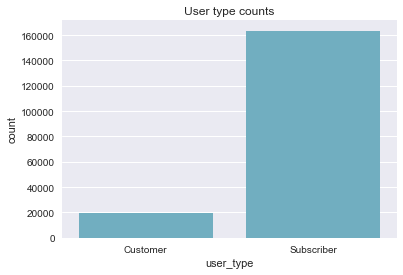

In [270]:
base_color = sb.color_palette()[5]
sb.countplot(data = df , x = 'user_type', color = base_color)
plt.title('User type counts');

**As shown above, most of the riders was subscribers of the company.**

**Q2:At usual basis, who is ride bikes more frequently?**

In [271]:
df['member_gender'].value_counts()

Male      130651
Female     40844
Other       3652
Name: member_gender, dtype: int64

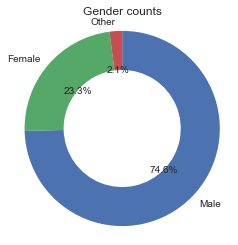

In [272]:
sorted_counts = df['member_gender'].value_counts()

plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90,
        counterclock = False, wedgeprops = {'width' : 0.4}, autopct='%1.1f%%');
plt.axis('square') 
plt.title('Gender counts');


**74% of riders were male. However, only 23 were female and 2% from other.**

**Q3:How much is the average total seconds for riding a bike?**

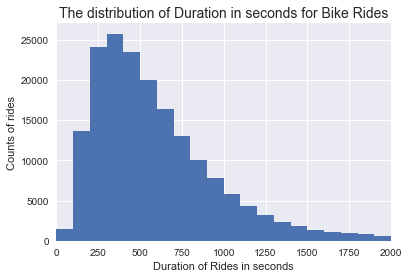

In [273]:
bins = np.arange(0, df['duration_sec'].max() +100 ,100)
plt.hist(data = df , x = 'duration_sec', bins = bins)
plt.xlabel('Duration of Rides in seconds');
plt.ylabel('Counts of rides');
plt.title('The distribution of Duration in seconds for Bike Rides', fontsize = 14);
plt.xlim(0, 2000);

**The data is right skewed. with the maximum of number of rides (25000) with 300 sec then it is gradually decreased**

# Bivariant Exploration :

**Q1:Is there any relationship between gender and subscribtion?** clustered bar chart

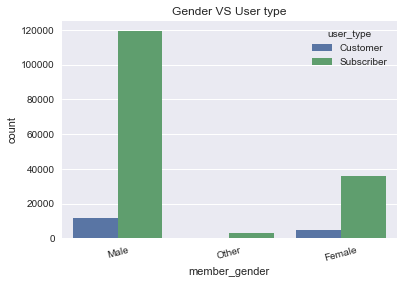

In [274]:
sb.countplot(data = df , x = 'member_gender' , hue = 'user_type')
plt.xticks(rotation = 15)
plt.title('Gender VS User type');

**Male subscriber more than female subscriber (triple the number of female subscriber)**

**Q2:Is there any relationship between the age of the person and duration of riding a bike?**line plot

Text(0.5, 1.0, 'Age VS Duration in hours')

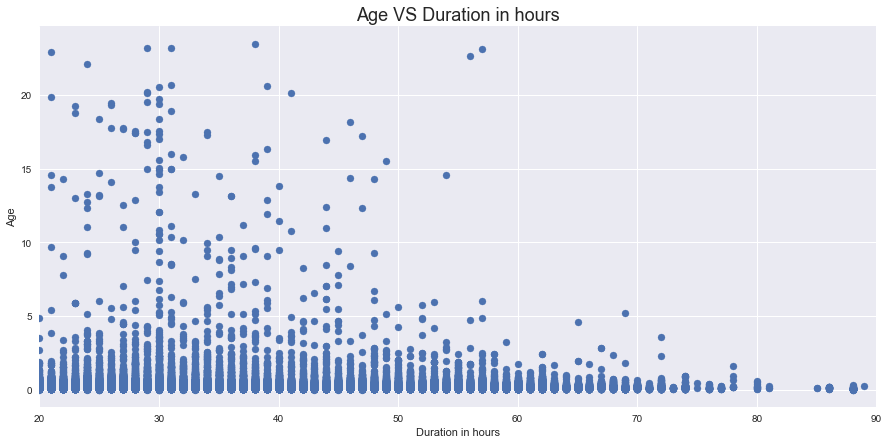

In [275]:
plt.figure(figsize = (15, 7))
plt.scatter(data = df, x = 'Age', y = 'duration_hours' , alpha= 1);
xaxis = plt.gca()
xaxis.set_xlim([20,90])
plt.style.use('seaborn')
plt.xlabel('Duration in hours')
plt.ylabel('Age')
plt.title('Age VS Duration in hours',fontsize = 18)

**Interpretation: People around age 30 tend to take the longest rides. Also; the older they became, the less ride duration they did.**

In [276]:
#scipy.stats.pearsonr(df['Age'], df['duration_hours'])

**Q3:Is there any relationship between the period of the day and duration of riding a bike?**


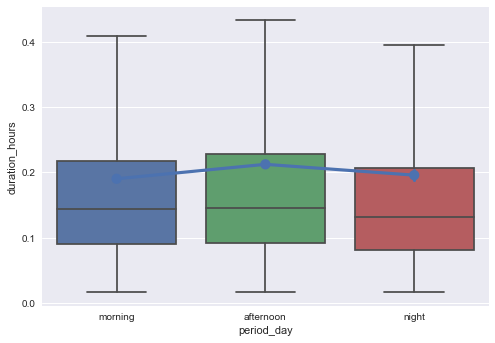

In [277]:
sb.boxplot(data = df ,x = 'period_day' ,y = 'duration_hours',showfliers=False)
sb.pointplot(data = df ,x = 'period_day' ,y = 'duration_hours')

**The longest rides took place at afternoon period with a wider range of duration as well.**

**Q4:How many people came at (morning , afternoon , night) from each gender?**

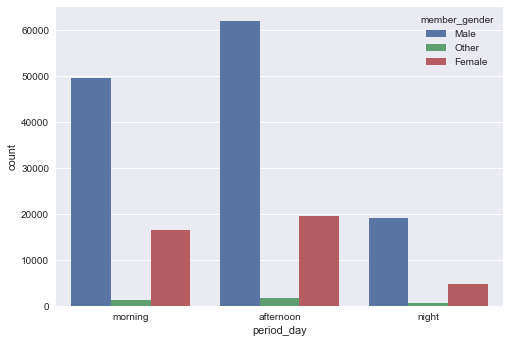

In [278]:
sb.countplot(data = df , x = 'period_day', hue = 'member_gender' )

**Male riders is the dominant majority for all of day periods especially at afternoon in contrast with other periods.**

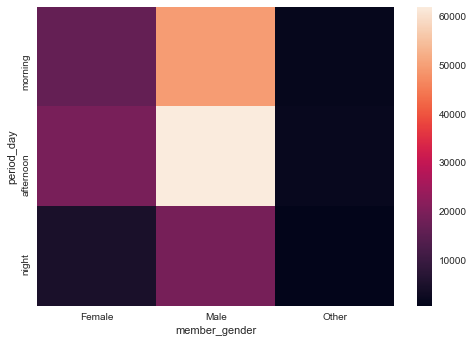

In [279]:
gvar = df.groupby(['period_day','member_gender']).size()
gvar = gvar.reset_index(name = 'count')
gvar = gvar.pivot(index = 'period_day' , columns = 'member_gender' , values = 'count')
sb.heatmap(gvar);

**The heat map tells the same story as the clustered bar chart.**

# Multivariate Exploration :

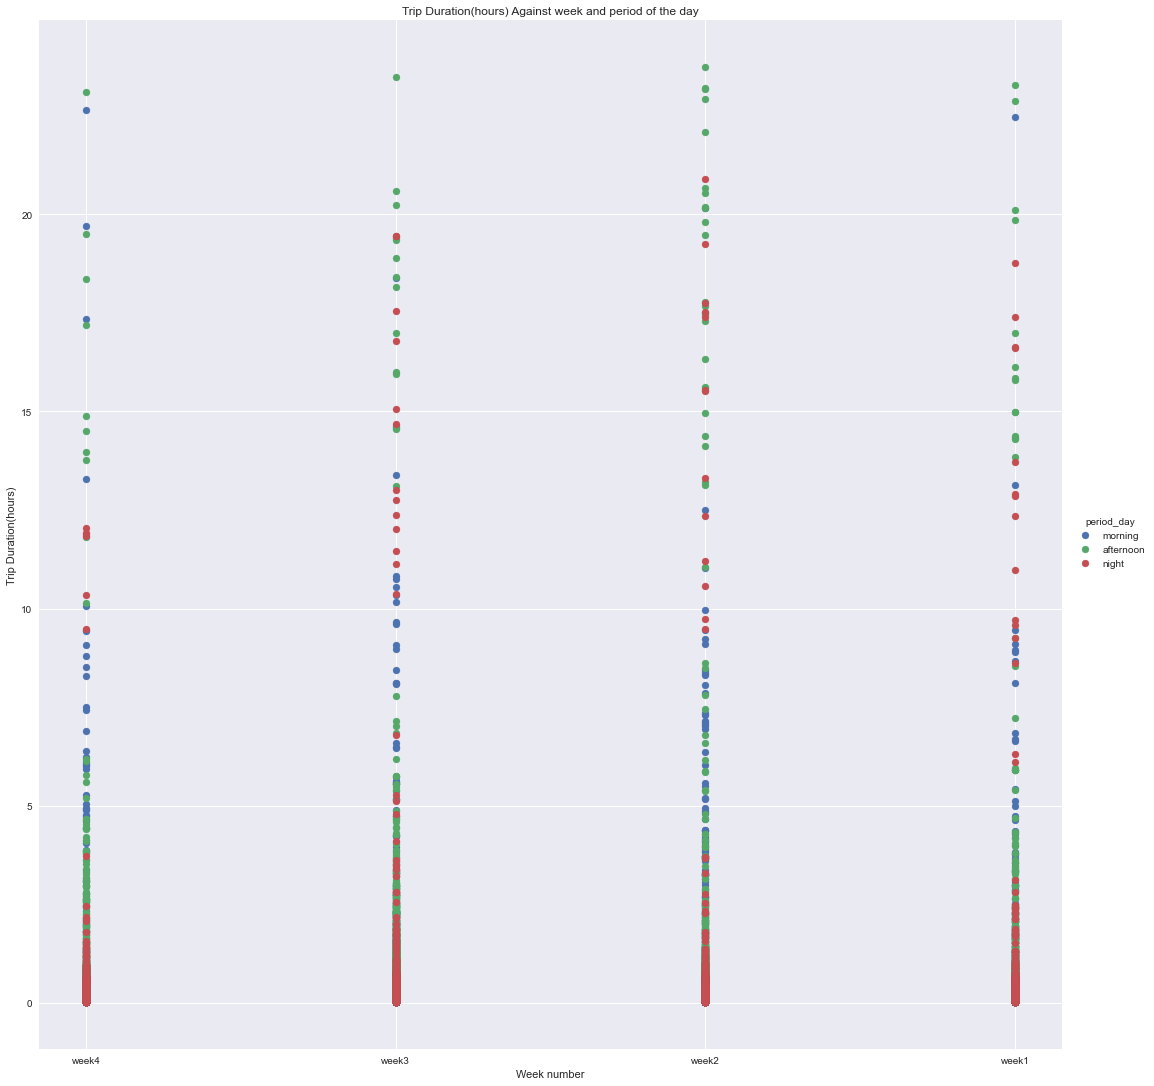

In [280]:
sb.FacetGrid(df,hue = "period_day",height = 15).map(plt.scatter,"week_num","duration_hours").add_legend();
plt.title('Trip Duration(hours) Against week and period of the day')
plt.xlabel('Week number')
plt.ylabel('Trip Duration(hours)')
plt.show();

**Less riding duration extended to 3 hours only was in night period for all February weeks. Most of people do riding with more duration were concentrated in afternoon period especially in first and second weeks of February. people tend to go riding at morning in the last week of the month of febryuary.**

# End of Notebook